# LinearLearner

3점 (0.0), (1, 1), (1,2)을 포함하는 데이터 집합 D가 있다고 가정해 봅시다. 우리는 데이터 세트를 설명하는 선형 함수 y=ax+b를 찾아야 합니다.

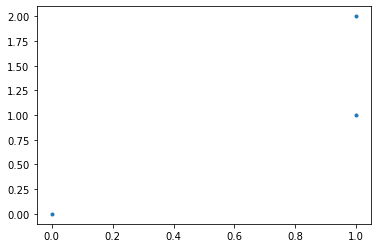

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

np_x = np.array([0,1,1])
np_y = np.array([0,1,2])

plt.plot(np_x, np_y, '.')
plt.show()         

## Define a linear model

In [2]:
import tensorflow as tf

a = tf.Variable(0.0)
b = tf.Variable(0.0)
x = tf.placeholder(tf.float32)
y = a*x + b

C:\Anaconda3\envs\nlp\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Anaconda3\envs\nlp\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Anaconda3\envs\nlp\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Anaconda3\envs\nlp\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (type, 1)

Instructions for updating:
Colocations handled automatically by placer.


## Define a loss

In [3]:
y_label = tf.placeholder(tf.float32)
loss = tf.reduce_sum(tf.square(y-y_label))

### Compute a loss given $a=b=0$.

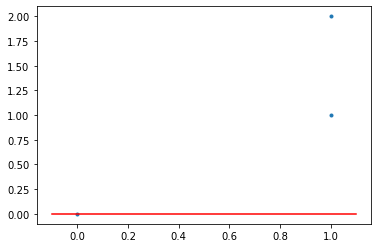

In [9]:
xs = np.arange(-0.1,1.1,0.1)
ys = 0*xs+0
plt.plot(np_x, np_y, '.', xs, ys, 'r')
plt.show()

In [7]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    print( sess.run(loss, feed_dict={x:np_x, y_label:np_y}))

5.0


## Use an optimizer

we want to minimize loss using the gradient descending optimizer.

In [10]:
optimizer = tf.train.GradientDescentOptimizer(0.01)
train_op = optimizer.minimize(loss)

Instructions for updating:
Use tf.cast instead.


In [12]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for step in range(1000):
        _, loss_value, a_value, b_value = sess.run([train_op, loss, a, b], 
                                                   feed_dict={x:np_x, y_label:np_y})
        print("Step : {}, loss_value : {}, a_value : {}, b_value : {}".format(steloss_value, a_value, b_value))

xs = np.arange(-0.1, 1.1, 0.1)
ys = a_value * xs + b_value
plt.plot(np_x, np_y, '.', xs, ys, 'r')
plt.show()

IndexError: tuple index out of range